# Transformation based on distributions

In this code we are going to decide which variables need a transformation in order to get a normal distribution.

In the first section we are going to give a timestamp per minute to our dataset, and then study duplicates and missing values.

The mainly section we study each variable at differents levels according to theis distributions and transformations.

        Status: Done

In [235]:
# packages 
import pandas as pd
import numpy as np

import missingno as msno 

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_theme(style="ticks")

import sys
sys.path.append('/Users/ben_rss/Documents/CMM_2024/cmmProject/')

from scipy.stats import kurtosis
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')



In [4]:
## connecting
db_name = "meteo_paranal" # meteo_paranal_test, meteo_paranal

client = MongoClient("mongodb://localhost:27017/")
db = client[db_name] # meteo_paranal_test
collection = db[db_name]

Here we are going to study 2022

In [204]:
year_to_query = 2022

query = [{"$match": {"Date time": {"$gte": f"{year_to_query}-01-01", "$lt": f"{year_to_query + 1}-01-01"}} }]

df_ = pd.DataFrame(list(collection.aggregate(query)))
df_.head()

,_id,Date time,Air Pressure at ground [hPa],Air Pressure Normalised [hPa],Air Temperature at 30m [C],Air Temperature at 2m [C],Air Temperature at ground [C],Air Temperature below VLT [C],Dew Temperature at 30m [C],Dew Temperature at 2m [C],...,Particle (Small) instantanous at 20m [1/m^3],Particle (Small) instantanous at 10m [1/m^3],Rain intensity instantanous [%],Wind Direction instantanous at 30m [deg],Wind Direction instantanous at 10m [deg],Wind Speed instantanous at 30m [m/s],Wind Speed instantanous at 10m [m/s],Wind Speed U instantanous at 20m [m/s],Wind Speed V instantanous at 20m [m/s],Wind Speed W instantanous at 20m [m/s]
0,65a73ba69e53e4c338a1fc5b,2022-01-01T00:00:51,742.28,1023.80,17.37,17.25,20.56,17.24,-5.48,-5.17,...,NaN,NaN,1,113,118,5.4,3.7,4.09,2.12,0.06
1,65a73ba69e53e4c338a1fc5c,2022-01-01T00:01:51,742.28,1023.80,17.28,17.20,20.55,17.13,-5.47,-5.31,...,NaN,NaN,1,118,118,4.5,3.2,4.10,2.14,0.25
2,65a73ba69e53e4c338a1fc5d,2022-01-01T00:02:51,742.30,1023.83,17.29,17.10,20.56,16.99,-5.56,-5.34,...,NaN,NaN,1,124,118,5.6,3.7,4.64,1.44,0.38
3,65a73ba69e53e4c338a1fc5e,2022-01-01T00:03:51,742.28,1023.80,17.22,17.01,20.56,16.98,-5.57,-5.38,...,NaN,NaN,1,118,124,5.5,4.0,4.77,2.15,0.11
4,65a73ba69e53e4c338a1fc5f,2022-01-01T00:04:51,742.28,1023.80,17.34,16.95,20.58,16.90,-5.38,-5.36,...,NaN,NaN,1,118,124,5.3,4.5,5.13,2.14,0.17


Now we import main columns using for Paranal

In [205]:

from utils.utils_columns import numeric_cols_using as numeric_col


In order to do modifications we save the original dataset

In [314]:
df = df_.copy()
df['Date time'] = pd.to_datetime(df['Date time'])
df=df.set_index(['Date time'])
df = df[numeric_col]
print(df.shape)
df.head(3)

(524246, 41)


,Air Pressure at ground [hPa],Air Pressure Normalised [hPa],Air Temperature at 30m [C],Air Temperature at 2m [C],Air Temperature at ground [C],Air Temperature below VLT [C],Dew Temperature at 30m [C],Dew Temperature at 2m [C],Dew Temperature below VLT [C],Rain intensity below VLT [%],...,Humidity instantanous at 2m [%],Humidity instantanous below VLT [%],Rain intensity instantanous [%],Wind Direction instantanous at 30m [deg],Wind Direction instantanous at 10m [deg],Wind Speed instantanous at 30m [m/s],Wind Speed instantanous at 10m [m/s],Wind Speed U instantanous at 20m [m/s],Wind Speed V instantanous at 20m [m/s],Wind Speed W instantanous at 20m [m/s]
Date time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:51,742.28,1023.80,17.37,17.25,20.56,17.24,-5.48,-5.17,-6.45,1,...,21.0,19.0,1,113,118,5.4,3.7,4.09,2.12,0.06
2022-01-01 00:01:51,742.28,1023.80,17.28,17.20,20.55,17.13,-5.47,-5.31,-6.44,1,...,21.0,19.0,1,118,118,4.5,3.2,4.10,2.14,0.25
2022-01-01 00:02:51,742.30,1023.83,17.29,17.10,20.56,16.99,-5.56,-5.34,-6.42,1,...,21.0,20.0,1,124,118,5.6,3.7,4.64,1.44,0.38


## Duplicates

In [315]:
print('Total duplicated minute: ',df.index.floor('min').duplicated(keep=False).sum())

Total duplicated minute:  730


Now we get the average in each minute

In [209]:
df.index = df.index.floor('min')
df = df.resample('min').apply(np.nanmean)

/var/folders/b0/69vxpwp54bj58xqzl4ynkwbw0000gn/T/ipykernel_3676/619733184.py:2: FutureWarning:

The provided callable <function nanmean at 0x10a8b42c0> is currently using DatetimeIndexResampler.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [211]:
print('Duplicated after get average per minute: ',df.index.duplicated(keep=False).sum())
print(df.shape)

Duplicated after get average per minute:  0
(525600, 41)


In [316]:
60*24*365

525600

## Missing values

Total missing values per column:

In [212]:
df.isna().sum()

Air Pressure at ground [hPa]                    1721
Air Pressure Normalised [hPa]                   1719
Air Temperature at 30m [C]                      1719
Air Temperature at 2m [C]                       1719
Air Temperature at ground [C]                   1719
Air Temperature below VLT [C]                   1719
Dew Temperature at 30m [C]                     14440
Dew Temperature at 2m [C]                      10915
Dew Temperature below VLT [C]                   1731
Rain intensity below VLT [%]                    1719
Relative Humidity at 30m [%]                   14440
Relative Humidity at 2m [%]                    10916
Relative Humidity below VLT [%]                 1731
Wind Direction at 30m (0/360) [deg]             1719
Wind Direction at 30m (180/-180) [deg]          1719
Wind Direction at 10m (0/360) [deg]             1719
Wind Direction at 10m (180/-180) [deg]          1719
Wind Speed at 30m [m/s]                         1719
Wind Speed at 10m [m/s]                       

<Figure size 640x480 with 0 Axes>

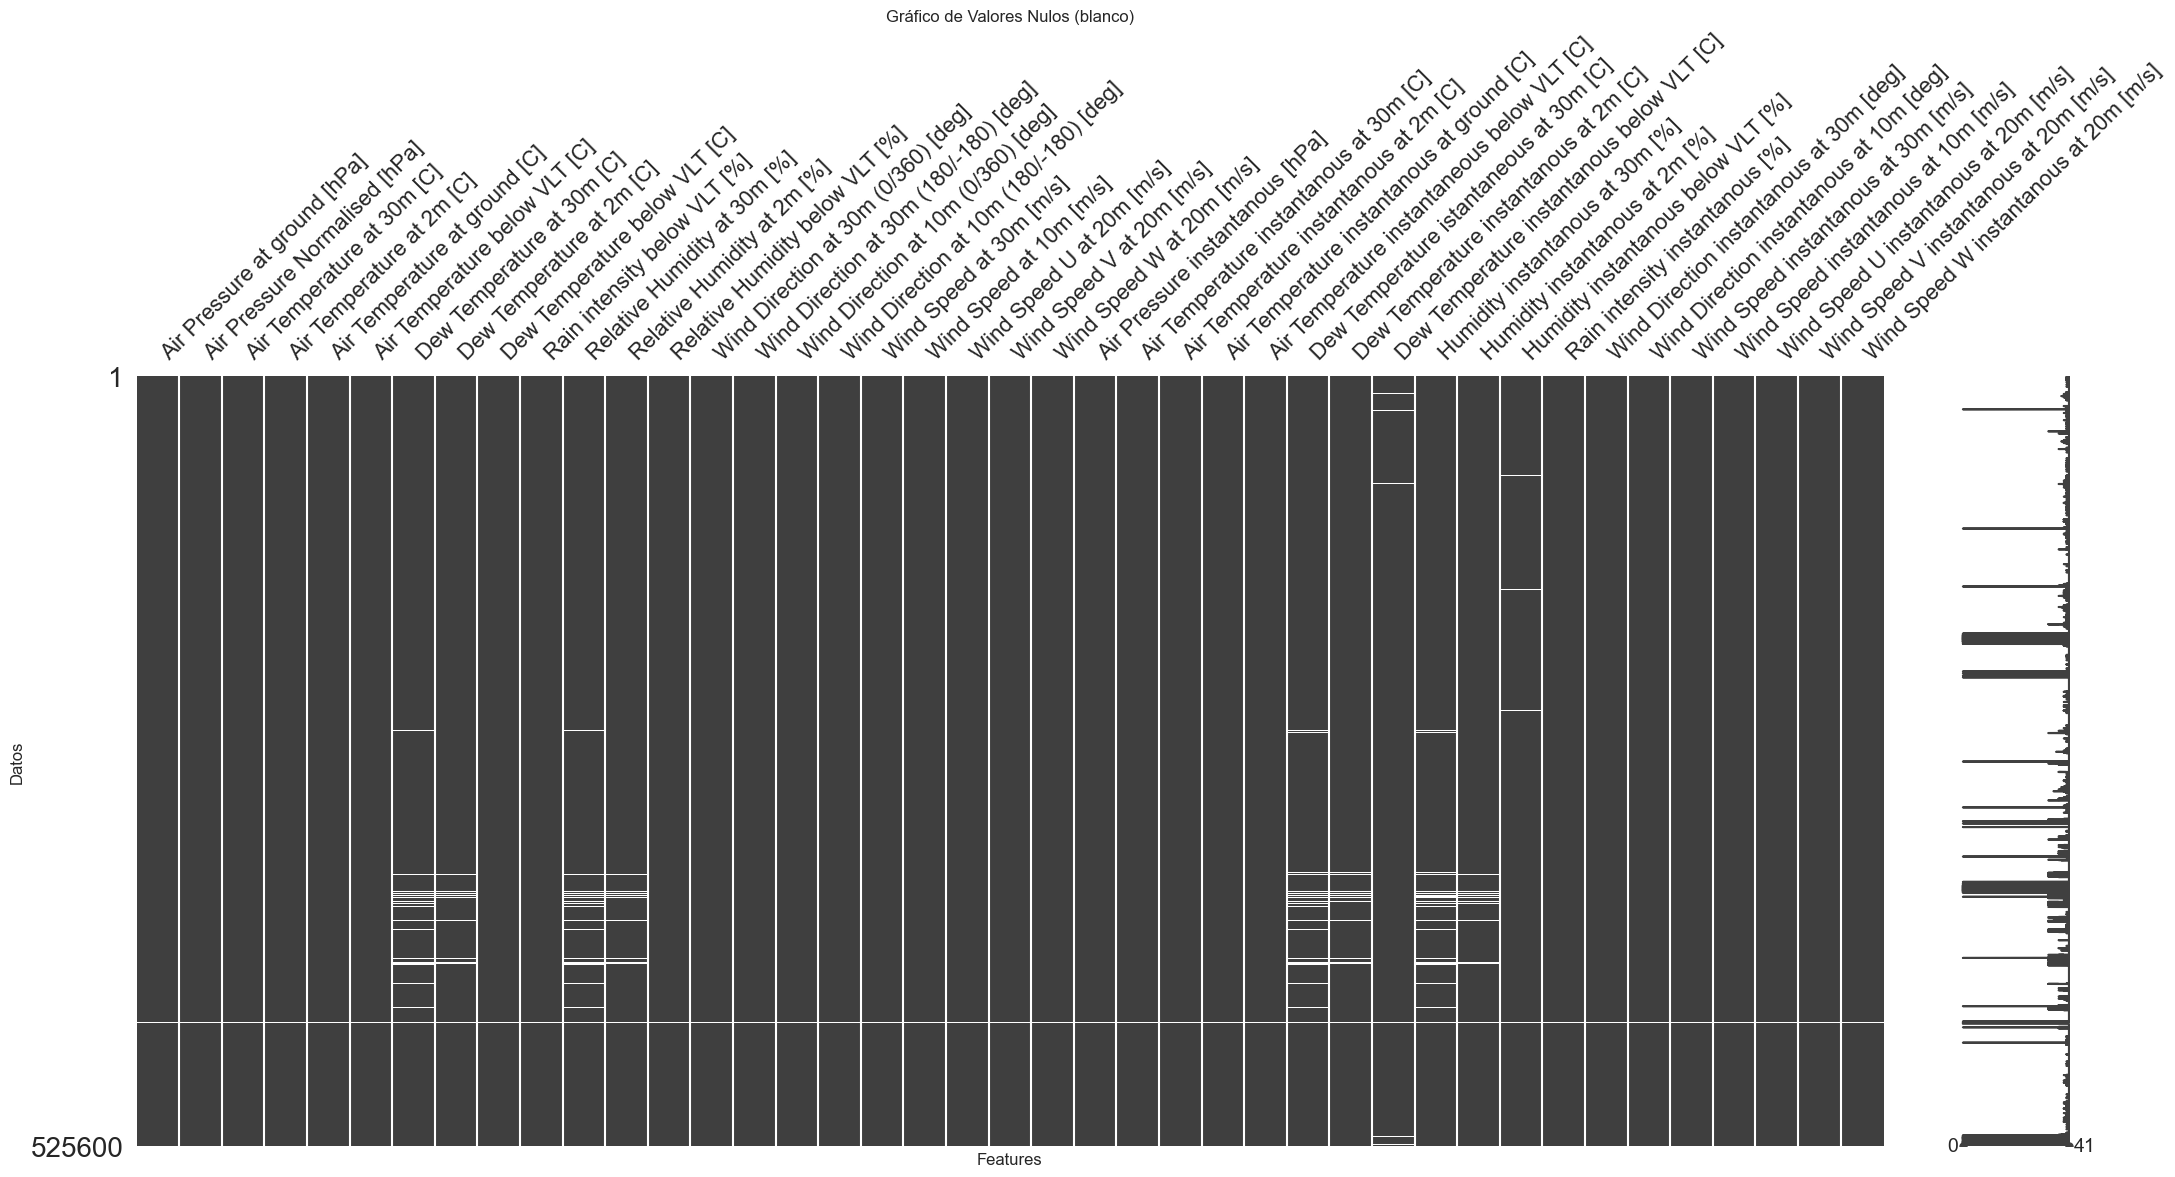

In [213]:
plt.clf()
msno.matrix(df)
plt.title('Gráfico de Valores Nulos (blanco)')
plt.xlabel('Features')
plt.ylabel('Datos')
plt.show()

In [14]:
def get_null_intervals(merged_df,column='Wind Direction at 30m (0/360) [deg]'):
    m = merged_df[column].isna()
    r = [[*g.index] for _, g in merged_df[m].groupby((~m).cumsum())]
    intervals = [(a[0],a[-1]) for a in r]
    return pd.DataFrame([[a[0],a[1],(a[1]-a[0]).seconds/3600] for a in intervals],
                columns=['inicial','final','horas']).sort_values('horas',ascending=False).reset_index(drop=True)

Here we select Wind Direction at 10m (180/-180) [deg] in order to study the minimum  interval of missing values

In [215]:
intervals_df = get_null_intervals(df,column='Wind Direction at 10m (180/-180) [deg]')
intervals_df.head(20)

,inicial,final,horas
0,2022-11-03 03:19:00,2022-11-03 21:46:00,18.450000
1,2022-07-24 06:30:00,2022-07-24 07:18:00,0.800000
2,2022-11-02 17:54:00,2022-11-02 18:18:00,0.400000
3,2022-03-14 02:49:00,2022-03-14 03:07:00,0.300000
4,2022-05-06 19:35:00,2022-05-06 19:46:00,0.183333
5,2022-11-05 12:19:00,2022-11-05 12:30:00,0.183333
6,2022-05-04 17:33:00,2022-05-04 17:42:00,0.150000
7,2022-11-05 12:46:00,2022-11-05 12:52:00,0.100000
8,2022-05-06 14:18:00,2022-05-06 14:23:00,0.083333
9,2022-05-07 13:41:00,2022-05-07 13:46:00,0.083333


In [216]:
print('Total minimum hours with missing values: ',intervals_df.horas.sum())

Total minimum hours with missing values:  21.95


In [328]:
# df = df.interpolate()
print('Shape before drop missing values: ', df.shape)
df = df.dropna()
print('After: ', df.shape)

Shape before drop missing values:  (524246, 41)
After:  (502250, 41)


# Main Section: Distribution study

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
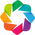

In [68]:
import holoviews as hv
from holoviews import opts
import hvplot.pandas

hv.extension('bokeh', 'matplotlib')

In [55]:
# histogram per variables 
def create_histogram(variable):
    return df.hvplot.hist(y=variable, bins=20, title=f'Histogram of {variable}')

variables_list = numeric_col
histogram_dmap = hv.DynamicMap(create_histogram, kdims=['variable']).redim.values(variable=variables_list)
layout = histogram_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'889d7c01-fbc9-4f97-8a30-4cea0d270f09': {'version…

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit( df)
df_transform = pd.DataFrame(data = scaler.transform(df),columns=df.columns,index= df.index)


from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df_transform2= quantile_transformer.fit_transform(df)
df_transform2 = pd.DataFrame(df_transform2, columns=df.columns, index=df.index)

In [332]:
def log2(x, eps=1e-15):
    return np.log(( x+eps )/ ( 1- x + eps) )

def log3(x, eps=1e-15):
    return np.log( ( x + 1 ) / ( 1 - x + eps ) )

def log(x,eps=1e-3):
    return np.log(x+eps) if x == 0 else np.log(x)

def sqrt(x):
    return np.sqrt(x) 

Now we study the variables per category

## Air temperature: Done

In [22]:
air_temp = ['Air Temperature at 30m [C]', # only scale
'Air Temperature at 2m [C]', 
'Air Temperature at ground [C]',
'Air Temperature below VLT [C]',
'Air Temperature instantanous at 30m [C]',
'Air Temperature instantanous at 2m [C]',
'Air Temperature instantanous at ground [C]',
'Air Temperature instantaneous below VLT [C]',
]

In [23]:
# histogram per variables 
def create_histogram(variable):
    return df.hvplot.hist(y=variable, bins=100, title=f'Histogram of {variable}')

variables_list = air_temp
histogram_dmap = hv.DynamicMap(create_histogram, kdims=['variable']).redim.values(variable=variables_list)
layout = histogram_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'40258c8d-c7a7-48e4-99a1-b274cf33f11c': {'version…

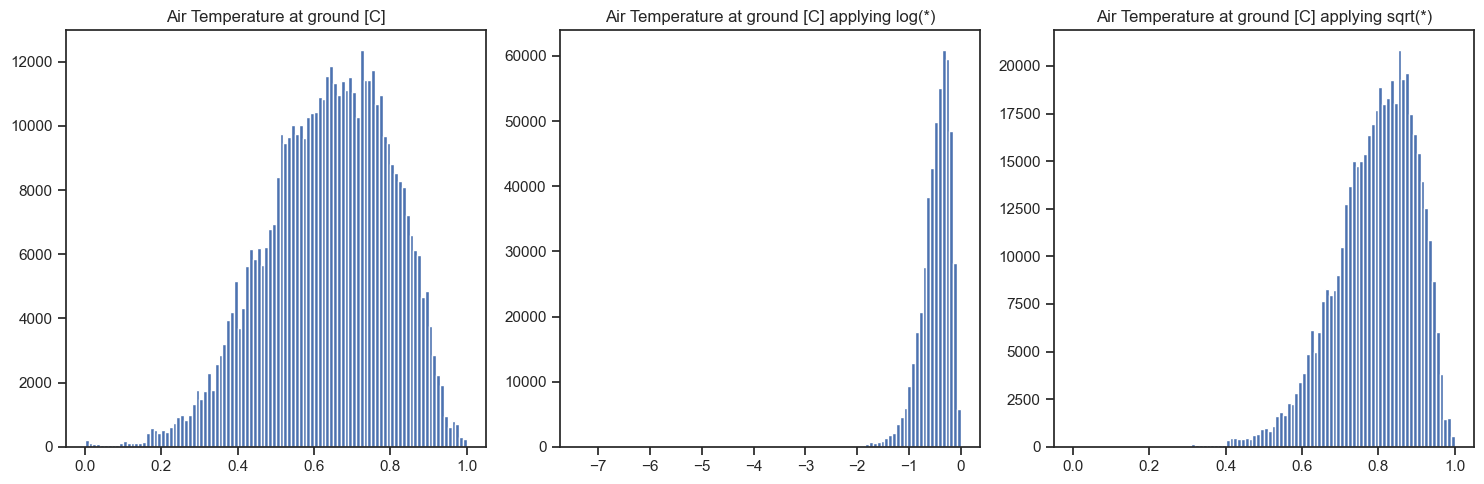

In [319]:
column = 'Air Temperature at ground [C]'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist( df_transform[column] , bins=100)
axs[0].set_title(f'{column}')

axs[1].hist( df_transform[column].apply(log) , bins=100)
axs[1].set_title(f'{column} applying log(*)')

axs[2].hist( df_transform[column].apply(sqrt) , bins=100)
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [320]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df_transform[column]))
print('skewness: ',skew(df_transform[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log) ) )
print('skewness: ',skew( df_transform[column].apply(log) ) )

print('\nScale and applying log2 function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log2) ) )
print('skewness: ',skew( df_transform[column].apply(log2) ) )

print('\nScale and applying log3 function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log3) ) )
print('skewness: ',skew( df_transform[column].apply(log3) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df_transform[column].apply(sqrt) ) )
print('skewness: ',skew( df_transform[column].apply(sqrt) ) )

kurtosis and skewness for  Air Temperature at ground [C]

Scale data
kurtosis:  -0.11113994440364827
skewness:  -0.4172111093398437

Scale and applying log function
kurtosis:  43.44726423621747
skewness:  -3.733942518136631

Scale and applying log2 function
kurtosis:  55.0028298782921
skewness:  0.3203167606064441

Scale and applying log3 function
kurtosis:  93.46302284691873
skewness:  2.5705301487681873

Scale and applying sqrt(*) function
kurtosis:  2.1802021832114953
skewness:  -0.9978966447185825


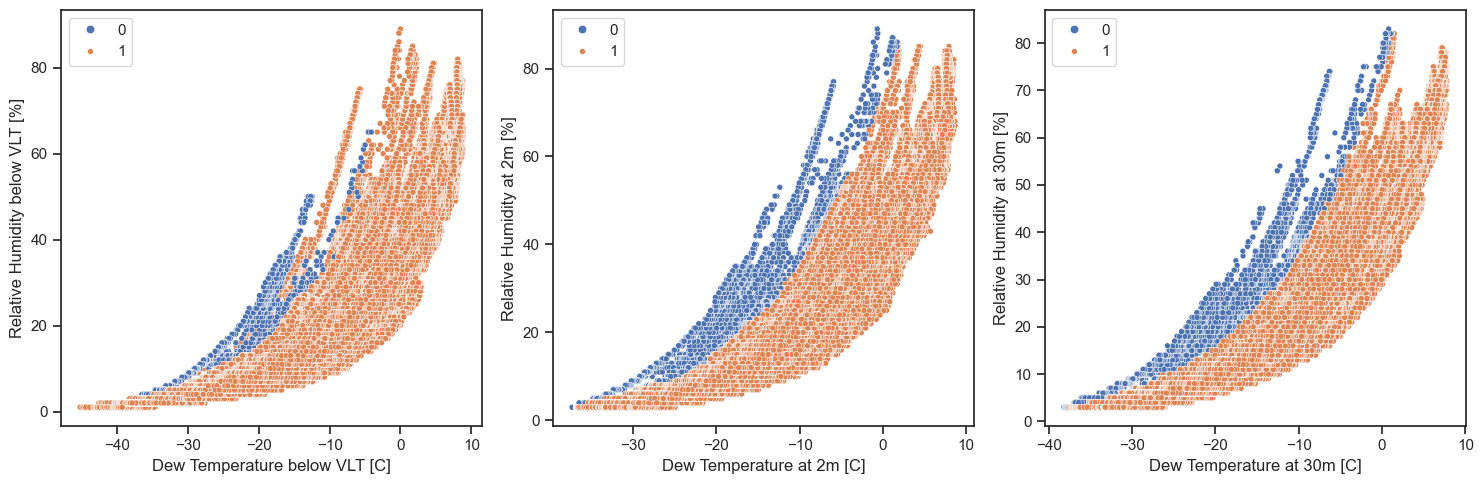

In [321]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df['Dew Temperature below VLT [C]'],y = df['Relative Humidity below VLT [%]'],
                hue = np.where(df['Air Temperature at ground [C]']<9.05,0,1), 
                size=1,ax=axs[0])
sns.scatterplot(x=df['Dew Temperature at 2m [C]'],y = df['Relative Humidity at 2m [%]'],
                hue = np.where(df['Air Temperature at 2m [C]']<4,0,1), 
                size=1, ax=axs[1])
sns.scatterplot(x=df['Dew Temperature at 30m [C]'],y = df['Relative Humidity at 30m [%]'],
                hue = np.where(df['Air Temperature at 30m [C]']<4,0,1), 
                size=1, ax=axs[2])
plt.tight_layout()

plt.show()

* here we can see that the left tail of the Air Temperature at ground [C] distribution are not outliers, they are part of the scatter plot. We have the same for Air temperature at 2m and 30m .
* So for air temperature would be better to apply scale min max 

## Air Pressure: Done

In [27]:
air_press_features = ['Air Pressure Normalised [hPa]' # nothing, only scale
'Air Pressure at ground [hPa]'
'Air Pressure instantanous [hPa]' ]


'Air Pressure instantanous [hPa]'

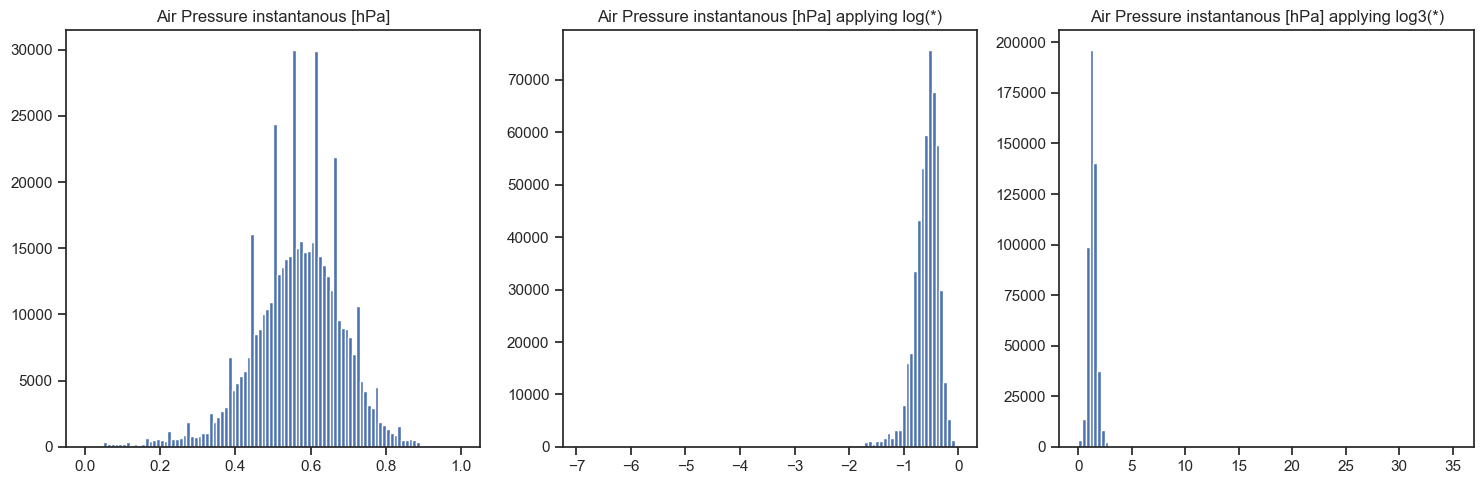

In [322]:
column = 'Air Pressure instantanous [hPa]'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(df_transform[column], bins=100)
axs[0].set_title(f'{column}')
axs[1].hist(df_transform[column].apply(log), bins=100)
axs[1].set_title(f'{column} applying log(*)')
axs[2].hist(df_transform[column].apply(log3), bins=100)
axs[2].set_title(f'{column} applying log3(*)')
plt.tight_layout()
plt.show()

In [29]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df_transform[column]))
print('skewness: ',skew(df_transform[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log) ) )
print('skewness: ',skew( df_transform[column].apply(log) ) )

print('\nScale and applying log2 function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log2) ) )
print('skewness: ',skew( df_transform[column].apply(log2) ) )

print('\nScale and applying log3 function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log3) ) )
print('skewness: ',skew( df_transform[column].apply(log3) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df_transform[column].apply(sqrt) ) )
print('skewness: ',skew( df_transform[column].apply(sqrt) ) )

kurtosis and skewness for  Air Pressure instantanous [hPa]

Scale data
kurtosis:  1.2494360360709686
skewness:  -0.5489276383590648

Scale and applying log function
kurtosis:  376.1516522408415
skewness:  -7.048822682305252

Scale and applying log2 function
kurtosis:  417.2192444294818
skewness:  2.7782981279491374

Scale and applying log3 function
kurtosis:  1189.5206932024657
skewness:  14.51594151178935

Scale and applying sqrt(*) function
kurtosis:  4.513782804843141
skewness:  -1.3215763551370547


* Here kurtisis goes high applying transformations, i.e. it tends to get more outliers if we compare to no-transformation, and even to get more skewness.

## Wind speed: Done

In [30]:
wind_speed_features = [
    'Wind Speed at 30m [m/s]', # sqrt
    'Wind Speed at 10m [m/s]', # sqrt
    'Wind Speed instantanous at 30m [m/s]', # sqrt
    'Wind Speed instantanous at 10m [m/s]', # sqrt
    #only scale
    'Wind Speed U at 20m [m/s]',
    'Wind Speed W at 20m [m/s]',
    'Wind Speed V at 20m [m/s]',
    'Wind Speed U instantanous at 20m [m/s]',
    'Wind Speed W instantanous at 20m [m/s]',
    'Wind Speed V instantanous at 20m [m/s]'
]


In [31]:
# histogram per variables 
def create_histogram(variable):
    return df.hvplot.hist(y=variable, bins=100, title=f'Histogram of {variable}')

variables_list = wind_speed_features
histogram_dmap = hv.DynamicMap(create_histogram, kdims=['variable']).redim.values(variable=variables_list)
layout = histogram_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'f57332ab-2699-47af-a2de-44a3d2b97d8a': {'version…

### Wind Speed at 10-30 m

Wind Speed at 30m [m/s]


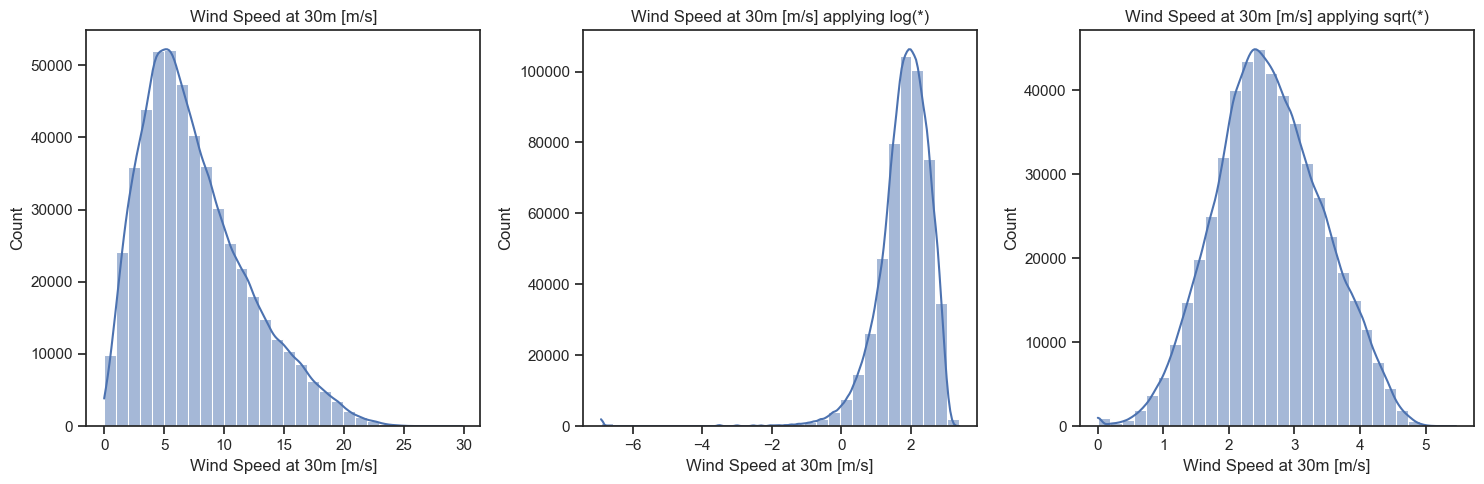

In [330]:
column = 'Wind Speed at 30m [m/s]'
print(column)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df[column].apply(log), bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df[column].apply(sqrt), bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [331]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df[column].apply(log) ) )
print('skewness: ',skew( df[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df[column].apply(sqrt) ) )
print('skewness: ',skew( df[column].apply(sqrt) ) )

kurtosis and skewness for  Wind Speed at 30m [m/s]

Scale data
kurtosis:  0.23322988380532061
skewness:  0.7983551105817815

Scale and applying log function
kurtosis:  24.82629573682641
skewness:  -2.9384041246062105

Scale and applying sqrt(*) function
kurtosis:  -0.27010245107659214
skewness:  0.050953142951237484


There distributions has good kurtosis, but they are right skewness, so here we see that squared root transformation has better fit.

### Wind Speed at 20m U-V-W

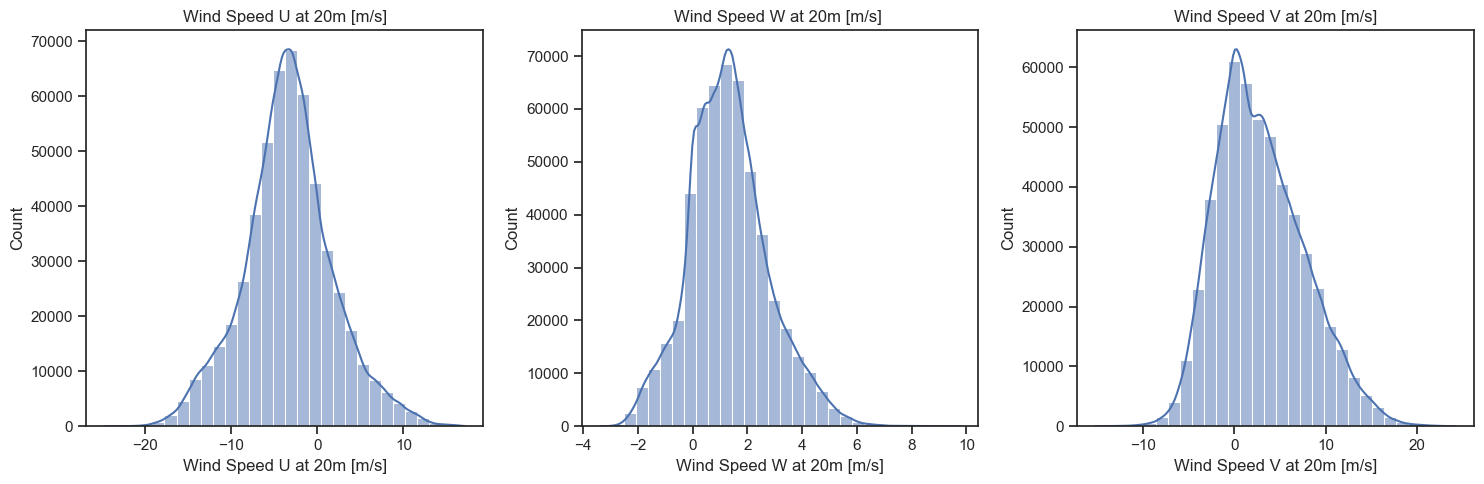

In [323]:
columns_wind_speed_uvw = [
    'Wind Speed U at 20m [m/s]',
    'Wind Speed W at 20m [m/s]',
    'Wind Speed V at 20m [m/s]',]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[columns_wind_speed_uvw[0]], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{columns_wind_speed_uvw[0]}')

sns.histplot(df[columns_wind_speed_uvw[1]], bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{columns_wind_speed_uvw[1]} ')

sns.histplot(df[columns_wind_speed_uvw[2]], bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{columns_wind_speed_uvw[2]}')
plt.tight_layout()
plt.show()

In [35]:
for i in range(3):
    print('\nkurtosis and skewness for ', columns_wind_speed_uvw[i])
    print('kurtosis: ',kurtosis(df[columns_wind_speed_uvw[i]]))
    print('skewness: ',skew(df[columns_wind_speed_uvw[i]]))


kurtosis and skewness for  Wind Speed U at 20m [m/s]
kurtosis:  0.4011895635811604
skewness:  0.09887770714982175

kurtosis and skewness for  Wind Speed W at 20m [m/s]
kurtosis:  0.3839326959457887
skewness:  0.35582315117400604

kurtosis and skewness for  Wind Speed V at 20m [m/s]
kurtosis:  -0.11914044371541577
skewness:  0.44598550908473905


* These three distributions are like normal, also its kurtosis and skewness are bit different to the ideal. Furthermore, they have values <0, so it would need an scaler before to apply any transformation (logarithmic or squared root). Therefore, it would be better with only an min-max scaler.

## Drew: Done

In [150]:
# aplicar solo minmax scaler
dew_columns = ['Dew Temperature at 30m [C]',
'Dew Temperature at 2m [C]',
'Dew Temperature below VLT [C]',
'Dew Temperature istantaneous at 30m [C]',
'Dew Temperature instantanous at 2m [C]',
'Dew Temperature instantanous below VLT [C]',]

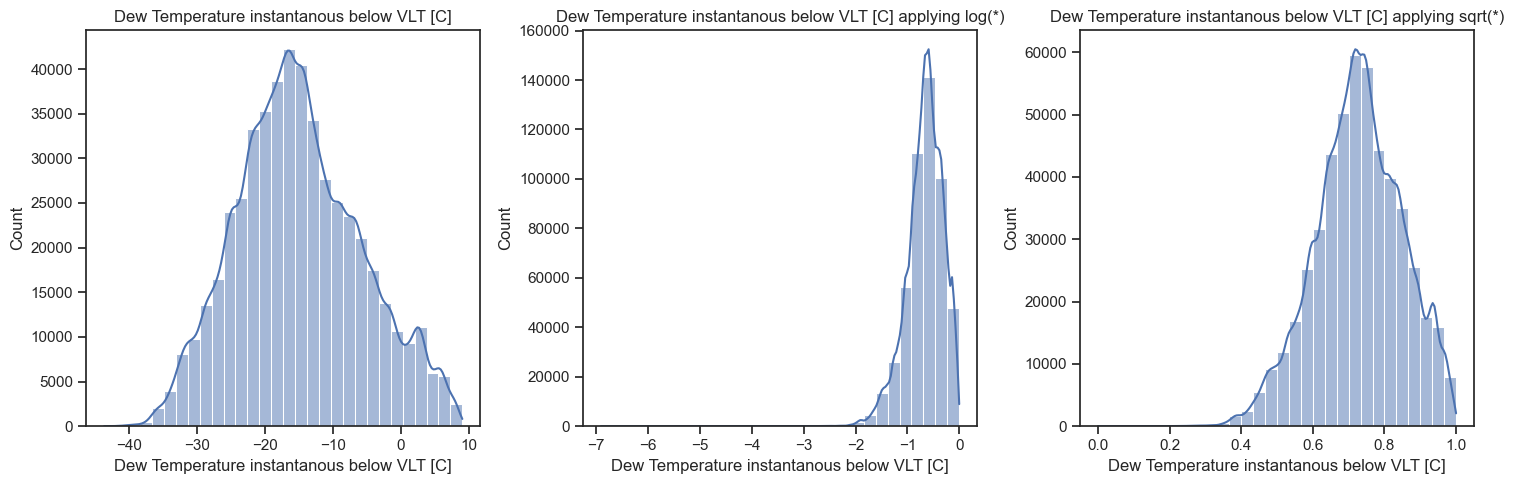

In [337]:
column = dew_columns[5]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df_transform[column].apply(log), bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df_transform[column].apply(sqrt), bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [336]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df_transform[column].apply(log) ) )
print('skewness: ',skew( df_transform[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df_transform[column].apply(sqrt) ) )
print('skewness: ',skew( df_transform[column].apply(sqrt) ) )

kurtosis and skewness for  Dew Temperature instantanous below VLT [C]

Scale data
kurtosis:  -0.3623099454479899
skewness:  0.23775239289472594

Scale and applying log function
kurtosis:  1.2004389773660522
skewness:  -0.7577258990214558

Scale and applying sqrt(*) function
kurtosis:  -0.16276822304199445
skewness:  -0.1970967550098738


* Here would be better no apply any function, in all these features related to drew temperature, if we apply any transformation, kutosis in all cases gets higher

## Humidity: Done

In [40]:
humidity_features = ['Humidity instantanous at 30m [%]', # sqrt
'Humidity instantanous at 2m [%]', #sqrt
'Humidity instantanous below VLT [%]', # sqrt
'Relative Humidity at 30m [%]',
'Relative Humidity at 2m [%]',
'Relative Humidity below VLT [%]',]

In [41]:
# histogram per variables 
def create_histogram(variable):
    return df.hvplot.hist(y=variable, bins=100, title=f'Histogram of {variable}')

variables_list = humidity_features
histogram_dmap = hv.DynamicMap(create_histogram, kdims=['variable']).redim.values(variable=variables_list)
layout = histogram_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'33a68b1d-0500-447d-91f9-1e82810d73f3': {'version…

### Humidity at 30 m

Humidity instantanous at 30m [%]


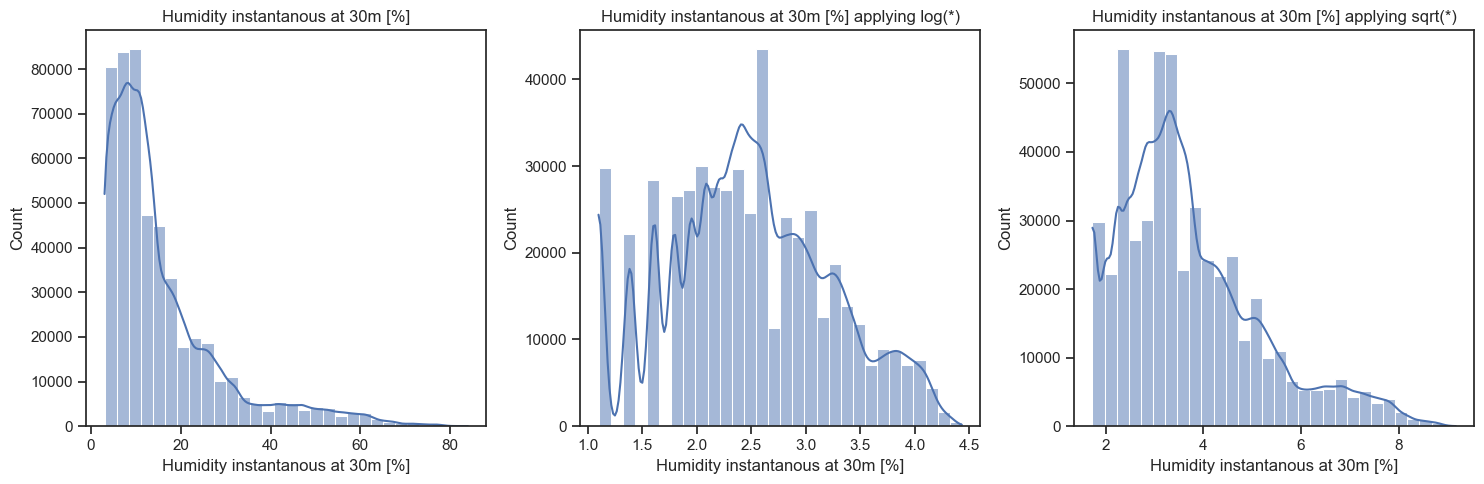

In [169]:
column = 'Humidity instantanous at 30m [%]'
print(column)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df[column].apply(log), bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df[column].apply(sqrt), bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [170]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df[column].apply(log) ) )
print('skewness: ',skew( df[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df[column].apply(sqrt) ) )
print('skewness: ',skew( df[column].apply(sqrt) ) )

kurtosis and skewness for  Humidity instantanous at 30m [%]

Scale data
kurtosis:  3.4145026807075833
skewness:  1.8315075992694176

Scale and applying log function
kurtosis:  -0.47926771982025684
skewness:  0.14666279321099154

Scale and applying sqrt(*) function
kurtosis:  0.6753708947644683
skewness:  0.9970199944262731


<Axes: xlabel='Humidity instantanous at 30m [%]', ylabel='Dew Temperature istantaneous at 30m [C]'>

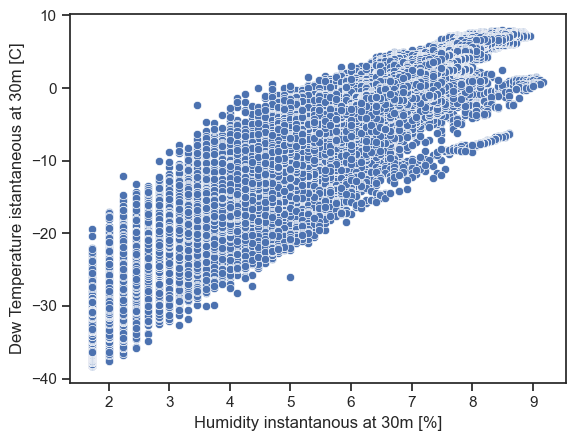

In [340]:
sns.scatterplot(x = df['Humidity instantanous at 30m [%]'].apply(sqrt),y =df['Dew Temperature istantaneous at 30m [C]'])

### Humidity at 2 m

Humidity instantanous at 2m [%]


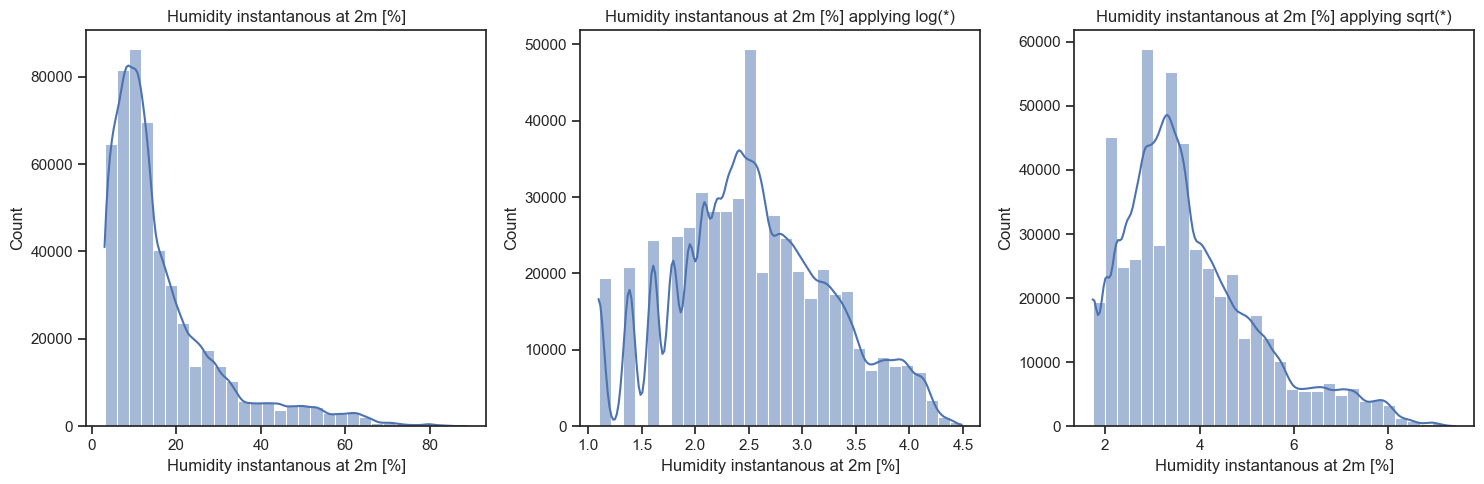

In [341]:
column = humidity_features[1]
print(column)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df[column].apply(log), bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df[column].apply(sqrt), bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [47]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df[column].apply(log) ) )
print('skewness: ',skew( df[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df[column].apply(sqrt) ) )
print('skewness: ',skew( df[column].apply(sqrt) ) )

kurtosis and skewness for  Humidity instantanous at 2m [%]

Scale data
kurtosis:  3.4580124417002853
skewness:  1.8286569568993027

Scale and applying log function
kurtosis:  -0.40947301337273867
skewness:  0.1484386360274877

Scale and applying sqrt(*) function
kurtosis:  0.7080318541401924
skewness:  0.9993465776768933


### Humidity below VLT

In [48]:
column = humidity_features[2]
print(column)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df[column].apply(log), bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df[column].apply(sqrt), bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

Humidity instantanous below VLT [%]


/var/folders/b0/69vxpwp54bj58xqzl4ynkwbw0000gn/T/ipykernel_3676/4125375036.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [49]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df[column].apply(log) ) )
print('skewness: ',skew( df[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df[column].apply(sqrt) ) )
print('skewness: ',skew( df[column].apply(sqrt) ) )

kurtosis and skewness for  Humidity instantanous below VLT [%]

Scale data
kurtosis:  3.6572997245883387
skewness:  1.8585359537925314

Scale and applying log function
kurtosis:  -0.2925539413710885
skewness:  0.12383127477050217

Scale and applying sqrt(*) function
kurtosis:  0.7834212386884873
skewness:  1.010388678490431


### Remark
Humidity distribution in all levels has a right skew, so in order to normalize it we tried $\log (\cdot)$ and $ \sqrt(\cdot) $ transformation, with the first one, we got isoleated points in left tail which we could interpret them easielly as outlier (we know they are not, we see this in the scatterplot). In the other hand, we getting better results with $ \sqrt(\cdot) $, kde's curve is more smooth here in both tails.

## Rain

In [93]:
rain_features = [ # only scale
    'Rain intensity below VLT [%]',
    'Rain intensity instantanous [%]',
    ]

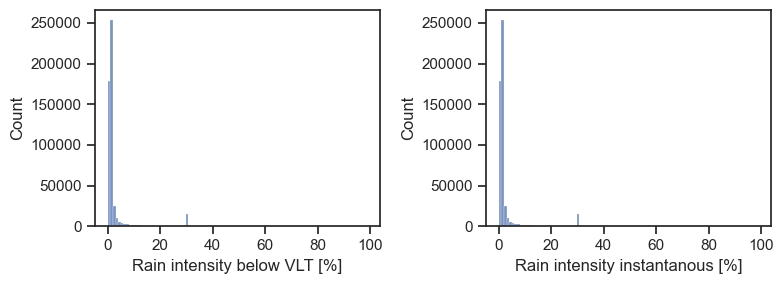

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
sns.histplot(data=df, x='Rain intensity below VLT [%]', ax=ax[0],bins = 100)
sns.histplot(data=df, x='Rain intensity instantanous [%]', ax=ax[1],bins=100)
plt.tight_layout()
plt.show()

Both rain variables has almost the same distribution

Rain intensity instantanous [%]


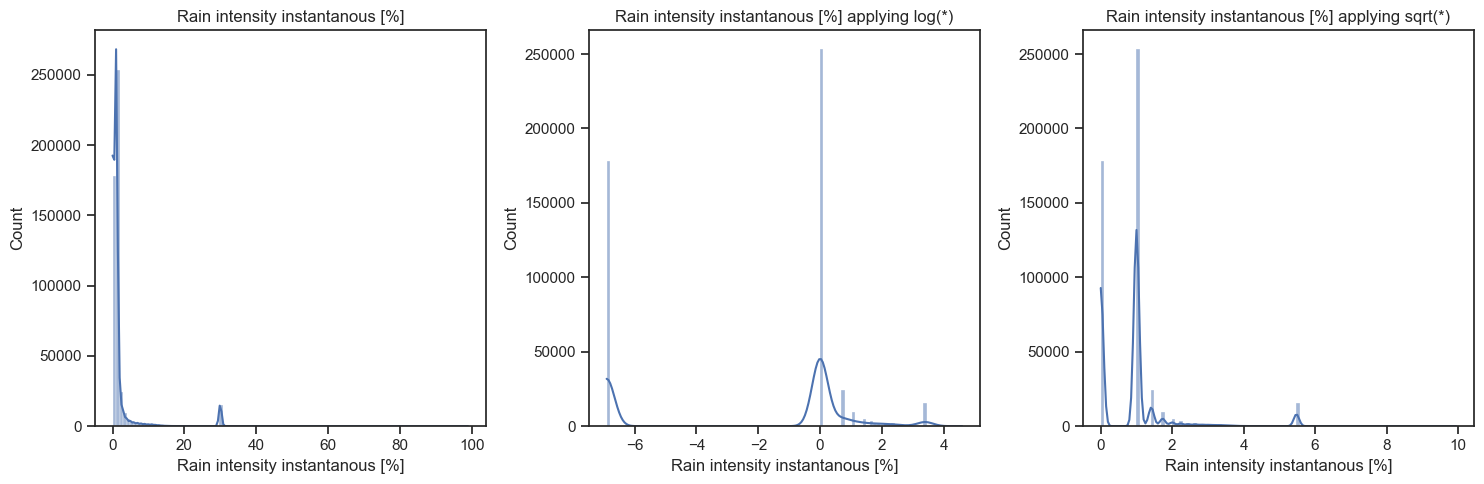

In [131]:
column = rain_features[1]
print(column)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=100, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df[column].apply(log), bins=100, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df[column].apply(sqrt), bins=100, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [107]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df[column].apply(log) ) )
print('skewness: ',skew( df[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df[column].apply(sqrt) ) )
print('skewness: ',skew( df[column].apply(sqrt) ) )

kurtosis and skewness for  Rain intensity instantanous [%]

Scale data
kurtosis:  23.099419723511712
skewness:  4.8115065534958985

Scale and applying log function
kurtosis:  -1.530172331718565
skewness:  -0.4655634529778624

Scale and applying sqrt(*) function
kurtosis:  9.02924760612213
skewness:  2.6411841206070314


 Here applying transformations we get better results for kurtosis and skewness. However, in plots we can see that if we apply any transformation, we get an "outlier" which is not an outlier in the original distribution. So would be better only keeping the variable.

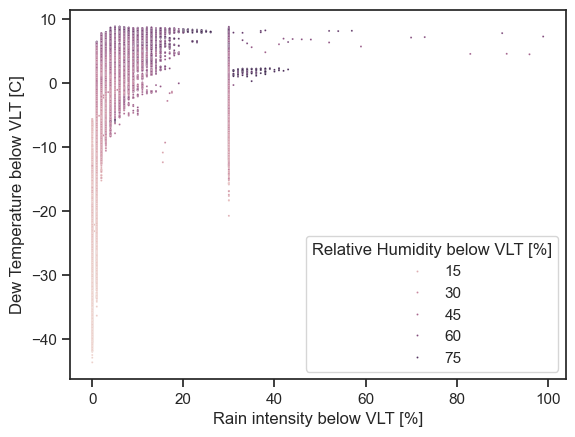

In [124]:
sns.scatterplot(x = df['Rain intensity below VLT [%]'], y = df['Dew Temperature below VLT [C]'],
                hue = df['Relative Humidity below VLT [%]'], s = 2)
plt.show()

In this plot we can see the values aroung 0 would be outliers applying transformations, when they are not. 

## Wind direction

In [132]:
wind_direction_features = [
    'Wind Direction at 30m (0/360) [deg]',
    'Wind Direction at 30m (180/-180) [deg]',
    'Wind Direction at 10m (0/360) [deg]',
    'Wind Direction at 10m (180/-180) [deg]',
    'Wind Direction instantanous at 30m [deg]',
    'Wind Direction instantanous at 10m [deg]',
    ]

In [133]:
# histogram per variables 
def create_histogram(variable):
    return df.hvplot.hist(y=variable, bins=100, title=f'Histogram of {variable}')

variables_list = wind_direction_features
histogram_dmap = hv.DynamicMap(create_histogram, kdims=['variable']).redim.values(variable=variables_list)
layout = histogram_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'1fe83702-d81d-4f39-be4e-a2845818bb43': {'version…

Wind Direction at 30m (0/360) [deg]


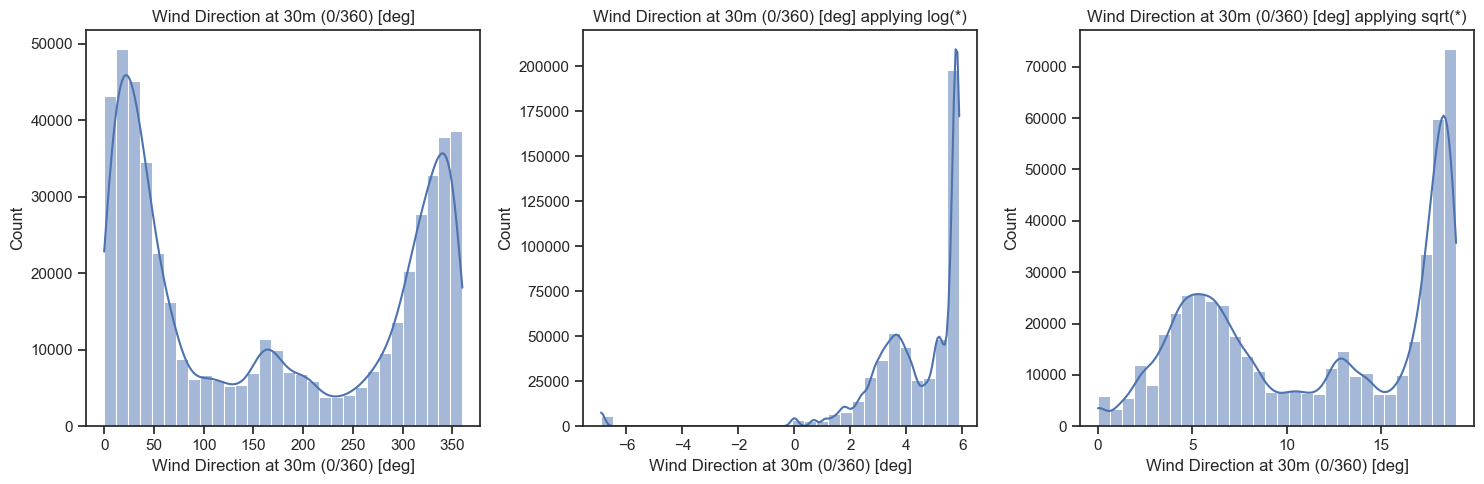

In [196]:
column = wind_direction_features[0]
print(column)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df[column], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'{column}')

sns.histplot(df[column].apply(log), bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'{column} applying log(*)')

sns.histplot(df[column].apply(sqrt), bins=30, kde=True, ax=axs[2])
axs[2].set_title(f'{column} applying sqrt(*)')
plt.tight_layout()
plt.show()

In [172]:
print('kurtosis and skewness for ', column)

print('\nScale data')
print('kurtosis: ',kurtosis(df[column]))
print('skewness: ',skew(df[column]))

print('\nScale and applying log function')
print('kurtosis: ',kurtosis( df[column].apply(log) ) )
print('skewness: ',skew( df[column].apply(log) ) )

print('\nScale and applying sqrt(*) function')
print('kurtosis: ',kurtosis( df[column].apply(sqrt) ) )
print('skewness: ',skew( df[column].apply(sqrt) ) )

kurtosis and skewness for  Wind Direction at 30m (0/360) [deg]

Scale data
kurtosis:  -1.6955146223409938
skewness:  0.16966451360633286

Scale and applying log function
kurtosis:  15.305194864081326
skewness:  -3.0215267639825596

Scale and applying sqrt(*) function
kurtosis:  -1.5527362616699512
skewness:  -0.13034457622223528


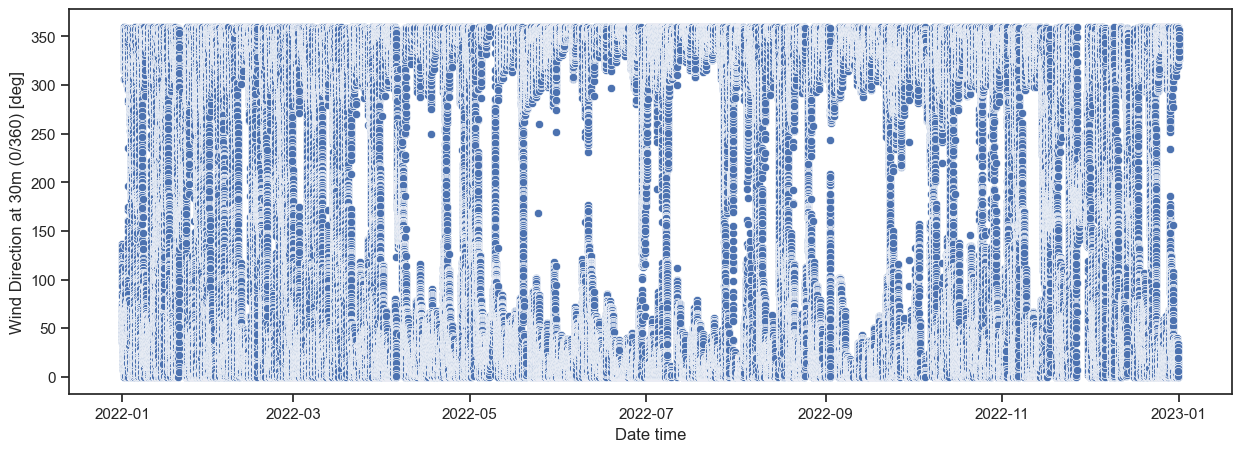

In [342]:
ax,fig = plt.subplots(figsize=(15,5))

sns.scatterplot(x = df.index,y = df['Wind Direction at 30m (0/360) [deg]'])
plt.show()

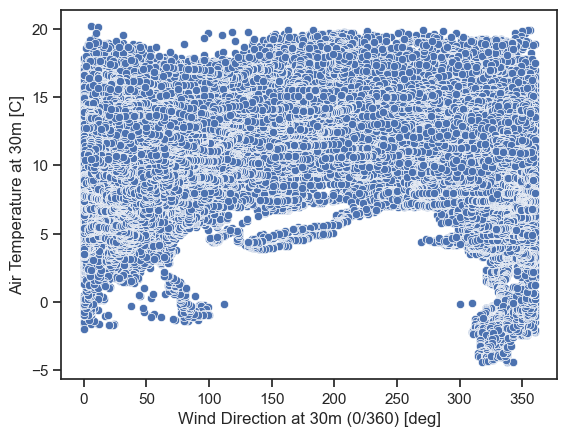

In [345]:
sns.scatterplot(y = df['Air Temperature at 30m [C]'], x= df['Wind Direction at 30m (0/360) [deg]'])
plt.show()

Here we can see a kind of non linear dependency with air temperature, this function would be $-x^2+c$

## Transformed variables through the years

In [254]:
should_use_sqrt = [
    'Wind Speed at 30m [m/s]', # sqrt
    'Wind Speed at 10m [m/s]', # sqrt
    'Wind Speed instantanous at 30m [m/s]', # sqrt
    'Wind Speed instantanous at 10m [m/s]', # sqrt
    'Humidity instantanous at 30m [%]', # sqrt
    'Humidity instantanous at 2m [%]', #sqrt
    'Humidity instantanous below VLT [%]', # sqrt
]


functions to get variables through specefic range of years to study transformations on distributions

In [346]:
def get_df_sqrt_features(i_year,f_year,should_use_sqrt):
    pipeline = [{"$match": {"Date time": {
                "$gte": f"{i_year}-01-01",
                "$lt": f"{f_year + 1}-01-01"}}},
                {"$project": {"_id": 0,**{f: f"${f}" for f in should_use_sqrt+['Date time']}
                              }}]

    df_sqrt_ = pd.DataFrame(list(collection.aggregate(pipeline)))
    df_sqrt_['Date time'] = pd.to_datetime(df_sqrt_['Date time'])
    df_sqrt_ = df_sqrt_.set_index(['Date time'])
    return df_sqrt_

def plot_by_years(df_sqrt,column,years):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 4))
    for i , year in enumerate(years):
        sns.histplot(df_sqrt[df_sqrt.index.year == year][column], bins=30, kde=True, ax=axs[i])
        axs[i].set_title(f'{year}')

    plt.tight_layout()
    plt.show()

def plot_by_years_sqrt(df_sqrt,column,years):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 4))
    for i , year in enumerate(years):
        sns.histplot(df_sqrt[df_sqrt.index.year == year][column].apply(sqrt), bins=30, kde=True, ax=axs[i])
        axs[i].set_title(f'{year}')

    plt.tight_layout()
    plt.show()


def get_dataset_sqrt_and_plot():
    df_sqrt = get_df_sqrt_features(i_year,f_year,should_use_sqrt)
    
    for column in should_use_sqrt:
        plot_by_years(df_sqrt,column,years)

    print("*"*100)
    print("\nAFTER SQUARED ROOT\n")
    print("*"*100)

    for column in should_use_sqrt:
        plot_by_years_sqrt(df_sqrt,column,years)

Now we select the lasts years to study the behavios applying sqrt function

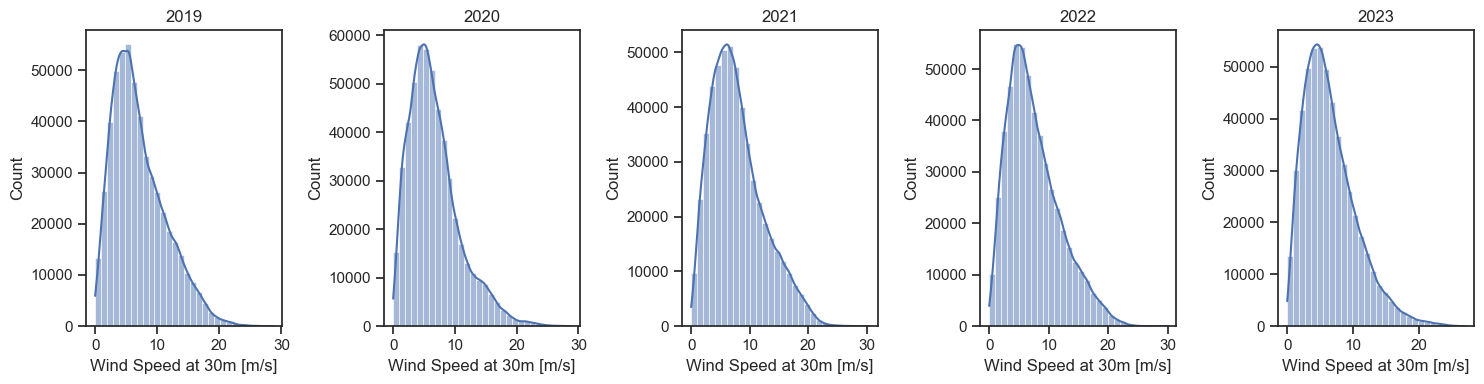

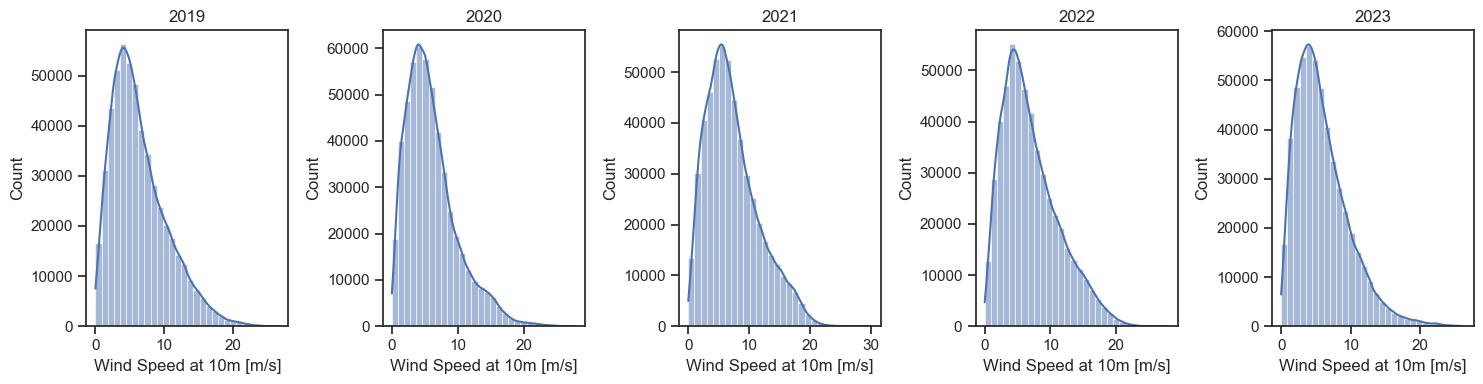

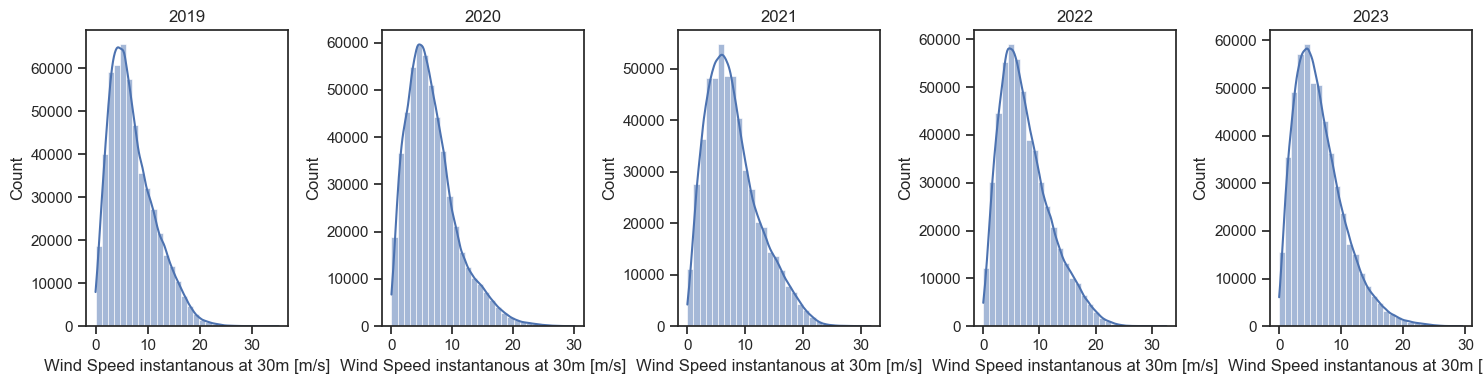

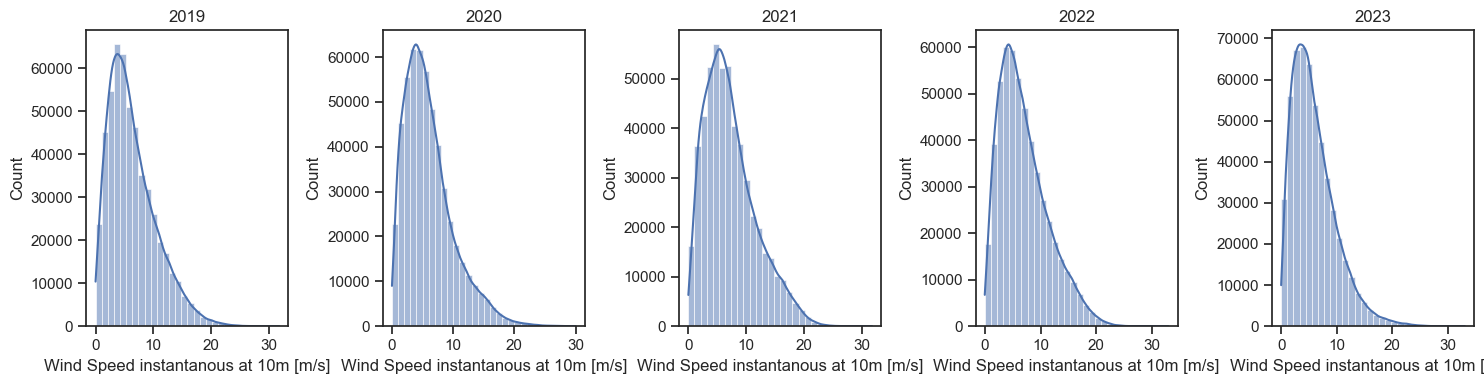

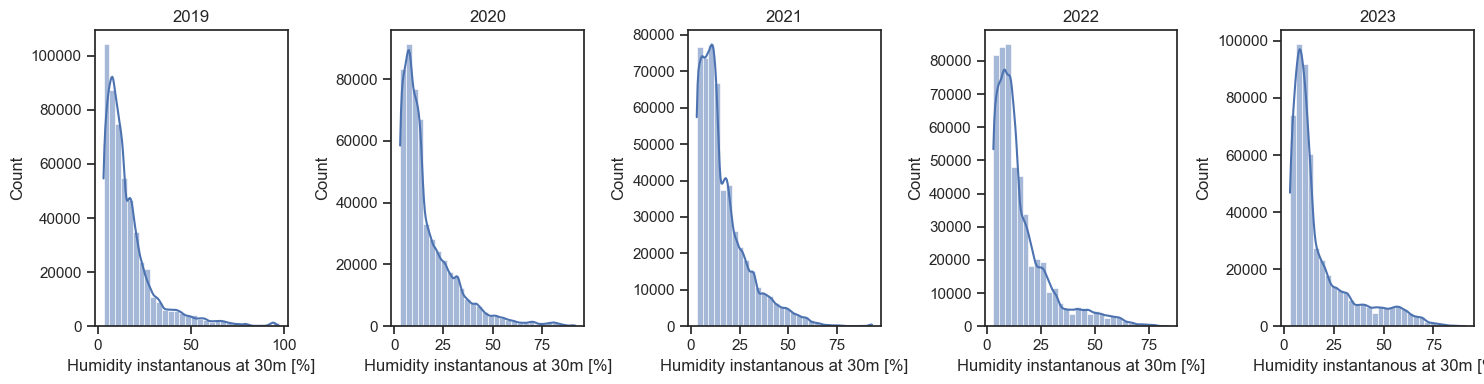

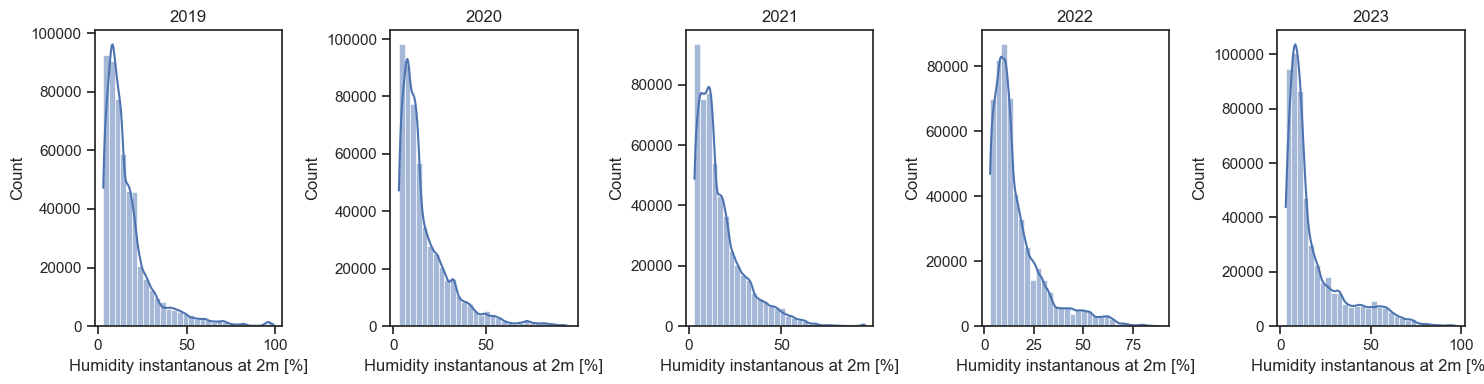

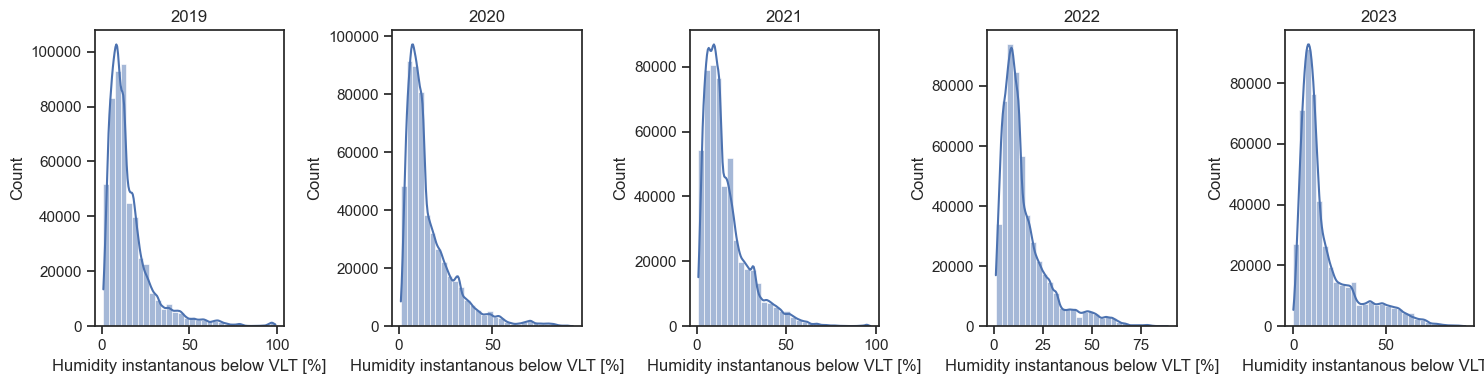

****************************************************************************************************

AFTER SQUARED ROOT

****************************************************************************************************


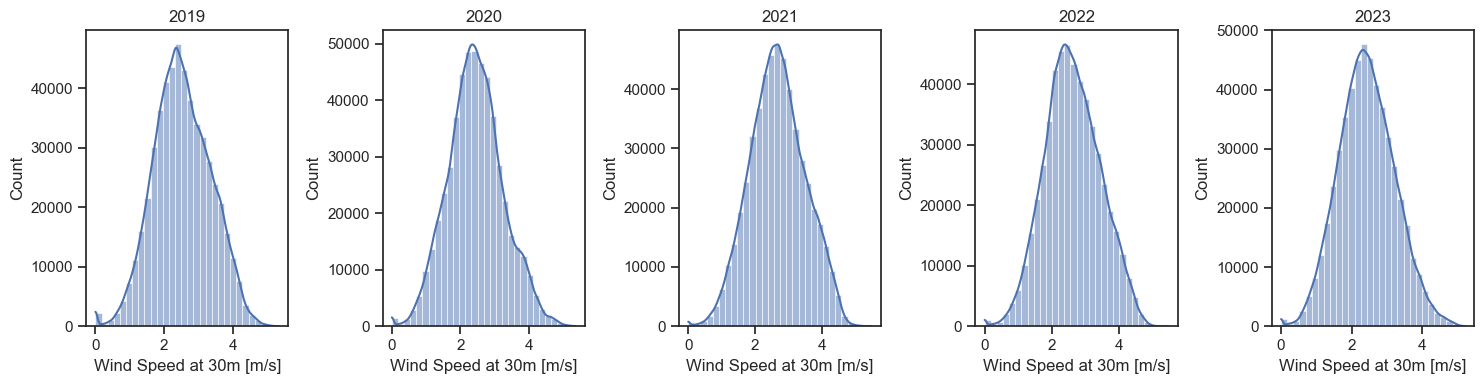

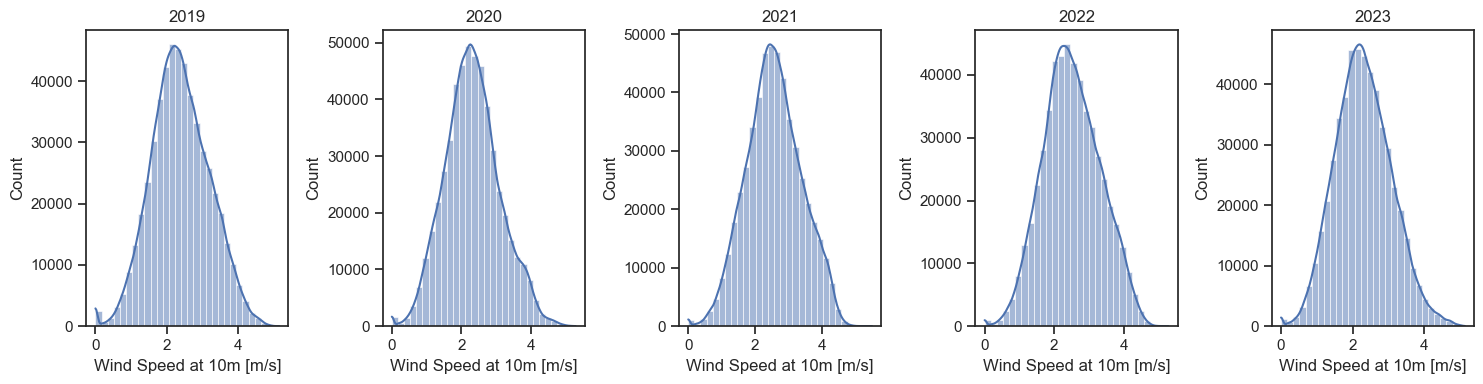

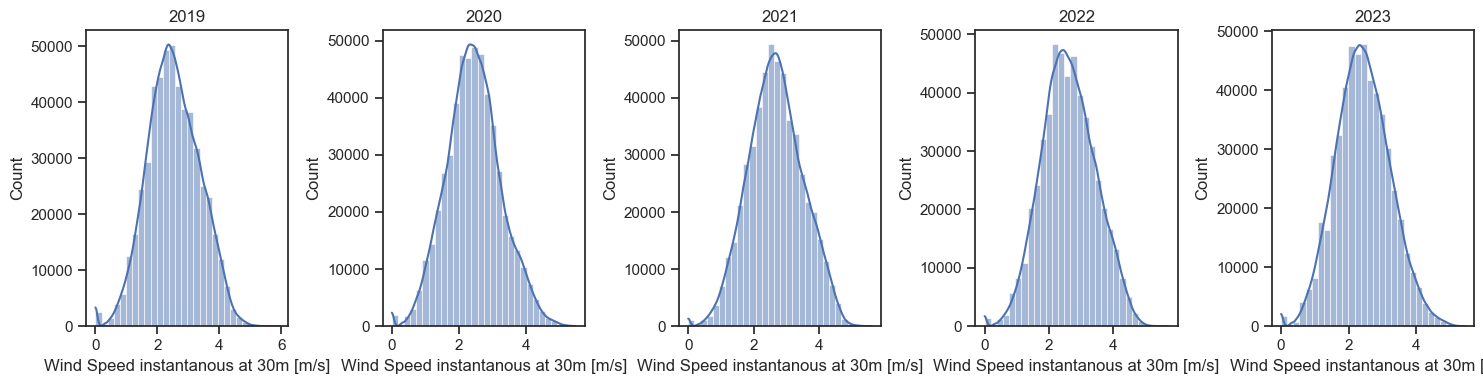

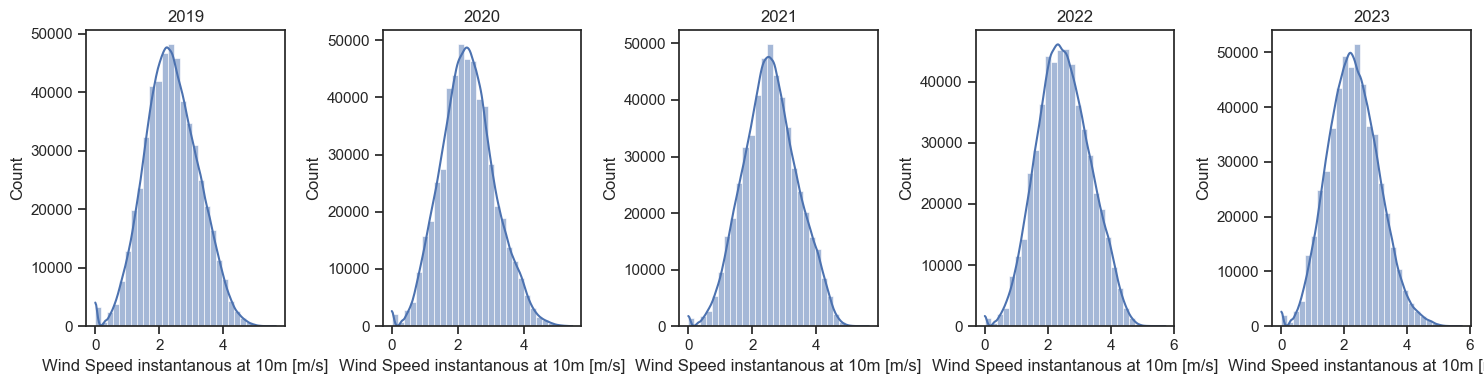

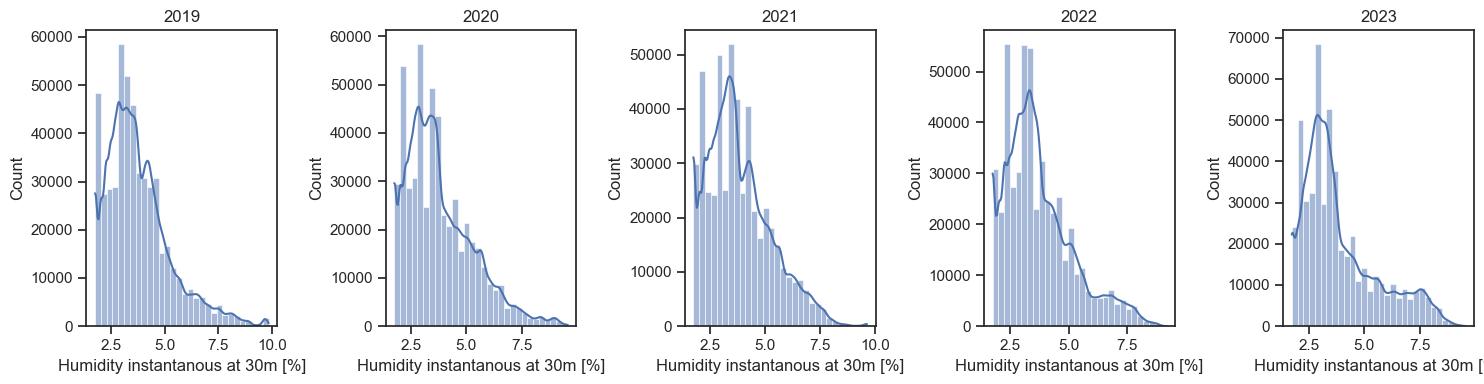

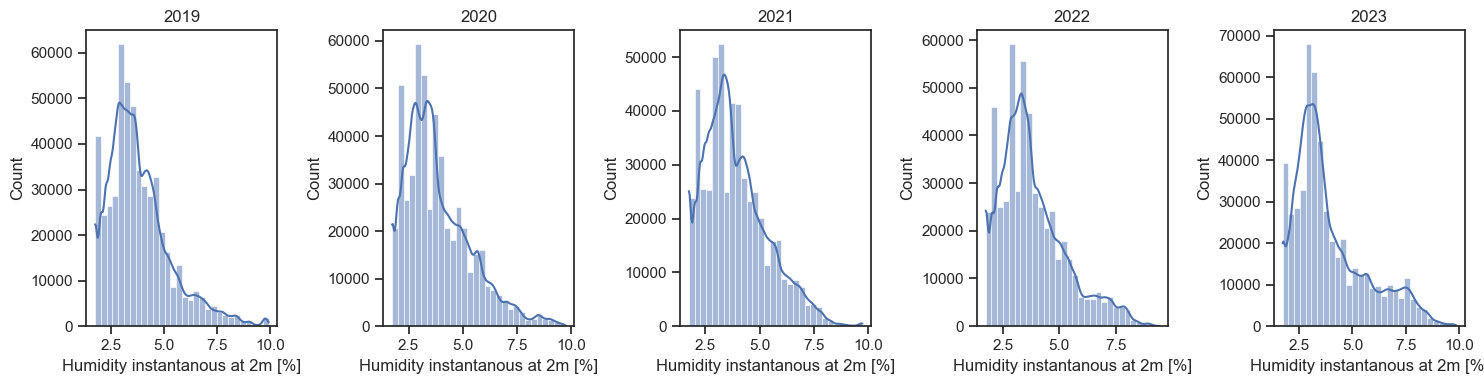

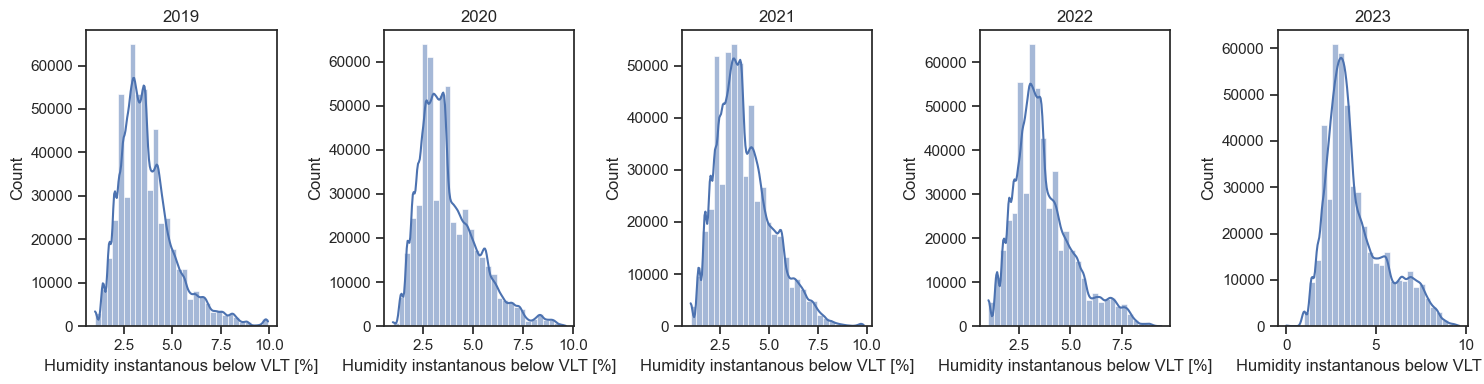

In [347]:
years = [2019,2020,2021,2022,2023]
i_year = years[0]
f_year = years[-1]


get_dataset_sqrt_and_plot()

## Getting scale per variable

In order to scale our variables to $[0,1]$ or $[-1,1]$, we need their minimum and maximum values, so we select all the data agreggated by hour according to min and max values registered per year, and then we get the average per feature.

In [260]:
## utils functions (skip this cell)

def dict_to_datetime(x):
   return f"{x['year']}-{x['month']}-{x['day']} {x['hour']}:00:00"


def get_datetime_index(df):
    df['_id'] = pd.to_datetime(df['_id'].apply(dict_to_datetime))
    df = df.set_index(['_id'])
    df = df.sort_index(ascending=True)
    return df

def get_df(aggregated_expression):

    pipeline = [ # query to get samples agreggated per hour
        {"$group": {
                "_id": {
                    "year": {"$year": {"$dateFromString": {"dateString": "$Date time"}}},
                    "month": {"$month": {"$dateFromString": {"dateString": "$Date time"}}},
                    "day": {"$dayOfMonth": {"$dateFromString": {"dateString": "$Date time"}}},
                    "hour": {"$hour": {"$dateFromString": {"dateString": "$Date time"}}},
                }, 
                **aggregated_expression}},
        {"$sort": {"_id.year": 1, "_id.month": 1, "_id.day": 1, "_id.hour": 1} }
    ]

    result = list(collection.aggregate(pipeline))

    return pd.DataFrame(result)


In [261]:
## uploading data

# defining what we want
# mean_agg = {f: {"$avg": f"${f}"} for f in numeric_col}
# std_agg = {f: {"$stdDevSamp": f"${f}"} for f in numeric_col}
min_agg = {f: {"$min": f"${f}"} for f in numeric_col}
max_agg = {f: {"$max": f"${f}"} for f in numeric_col}

# getting df
# df_mean = get_df(mean_agg)
# df_std = get_df(std_agg)
df_min = get_df(min_agg)
df_max = get_df(max_agg)

# getting datetime index
# df_mean = get_datetime_index(df_mean)
# df_std = get_datetime_index(df_std)
df_min = get_datetime_index(df_min)
df_max = get_datetime_index(df_max)


We are going to study between 2007 and 2023, because before of 2007 we have a lot of missing values, after 2023 we only have january data.

In [295]:
f1 = (df_min.index.year>=2007) & (df_min.index.year<=2023)
f2 = (df_max.index.year>=2007) & (df_max.index.year<=2023)

df_min_mean = df_min[f1].groupby(df_min[f1].index.year).min().mean()
df_max_mean = df_max[f2].groupby(df_max[f2].index.year).max().mean()


features_scale ={}

if (df_min_mean.index == df_max_mean.index).sum() ==41:

    for i,feature in enumerate(df_min_mean.index):
        features_scale[feature] = [round(df_min_mean[i],2),round(df_max_mean[i],2)]
    
    print('Scale range success')

else: ValueError('Columns are wrong')

Scale range success


In [343]:
features_scale

{'Air Pressure at ground [hPa]': [730.49, 806.45],
 'Air Pressure Normalised [hPa]': [1008.98, 1106.3],
 'Air Temperature at 30m [C]': [-4.27, 22.11],
 'Air Temperature at 2m [C]': [-4.18, 24.38],
 'Air Temperature at ground [C]': [7.29, 23.76],
 'Air Temperature below VLT [C]': [-3.71, 27.32],
 'Dew Temperature at 30m [C]': [-39.88, 8.84],
 'Dew Temperature at 2m [C]': [-39.06, 9.54],
 'Dew Temperature below VLT [C]': [-46.07, 9.82],
 'Rain intensity below VLT [%]': [0.0, 75.94],
 'Relative Humidity at 30m [%]': [2.82, 94.94],
 'Relative Humidity at 2m [%]': [2.82, 97.59],
 'Relative Humidity below VLT [%]': [0.88, 97.24],
 'Wind Direction at 30m (0/360) [deg]': [0.0, 360.0],
 'Wind Direction at 30m (180/-180) [deg]': [-179.0, 180.0],
 'Wind Direction at 10m (0/360) [deg]': [0.0, 360.0],
 'Wind Direction at 10m (180/-180) [deg]': [-179.0, 180.0],
 'Wind Speed at 30m [m/s]': [0.0, 28.99],
 'Wind Speed at 10m [m/s]': [0.0, 27.62],
 'Wind Speed U at 20m [m/s]': [-46.92, 44.94],
 'Wind Sp

In [309]:
df_test = pd.DataFrame()
df_test = df.copy()

This would be the transformation idea in order to create dataset and dataloader

In [311]:
for feature in features_scale.keys():
    if feature in should_use_sqrt:
        df_test[feature] = np.sqrt(df_test[feature])

    min = features_scale[feature][0]
    max = features_scale[feature][1]
    df_test[feature] =( df_test[feature]-min)/ (max-min) - 0.5
    df_test[feature] = np.tanh(df_test[feature] )
    